In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Step 1 Loat Data set

In [2]:
df1 = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')

In [3]:
df1

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


## Step 2 Basic Checks

In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [44]:
df1.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


## Step 3 EDA

In [40]:
# Renaming cols for better understanding
df1.columns=["States", "Date", "Frequency", "Estimated Unemployment Rate", "Estimated Employee",
            "Estimated Labour Participation Rate", "Region", "Logitude", "Latitude"]

In [41]:
df1.head(1)

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employee,Estimated Labour Participation Rate,Region,Logitude,Latitude
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74


### 1. Pair plot

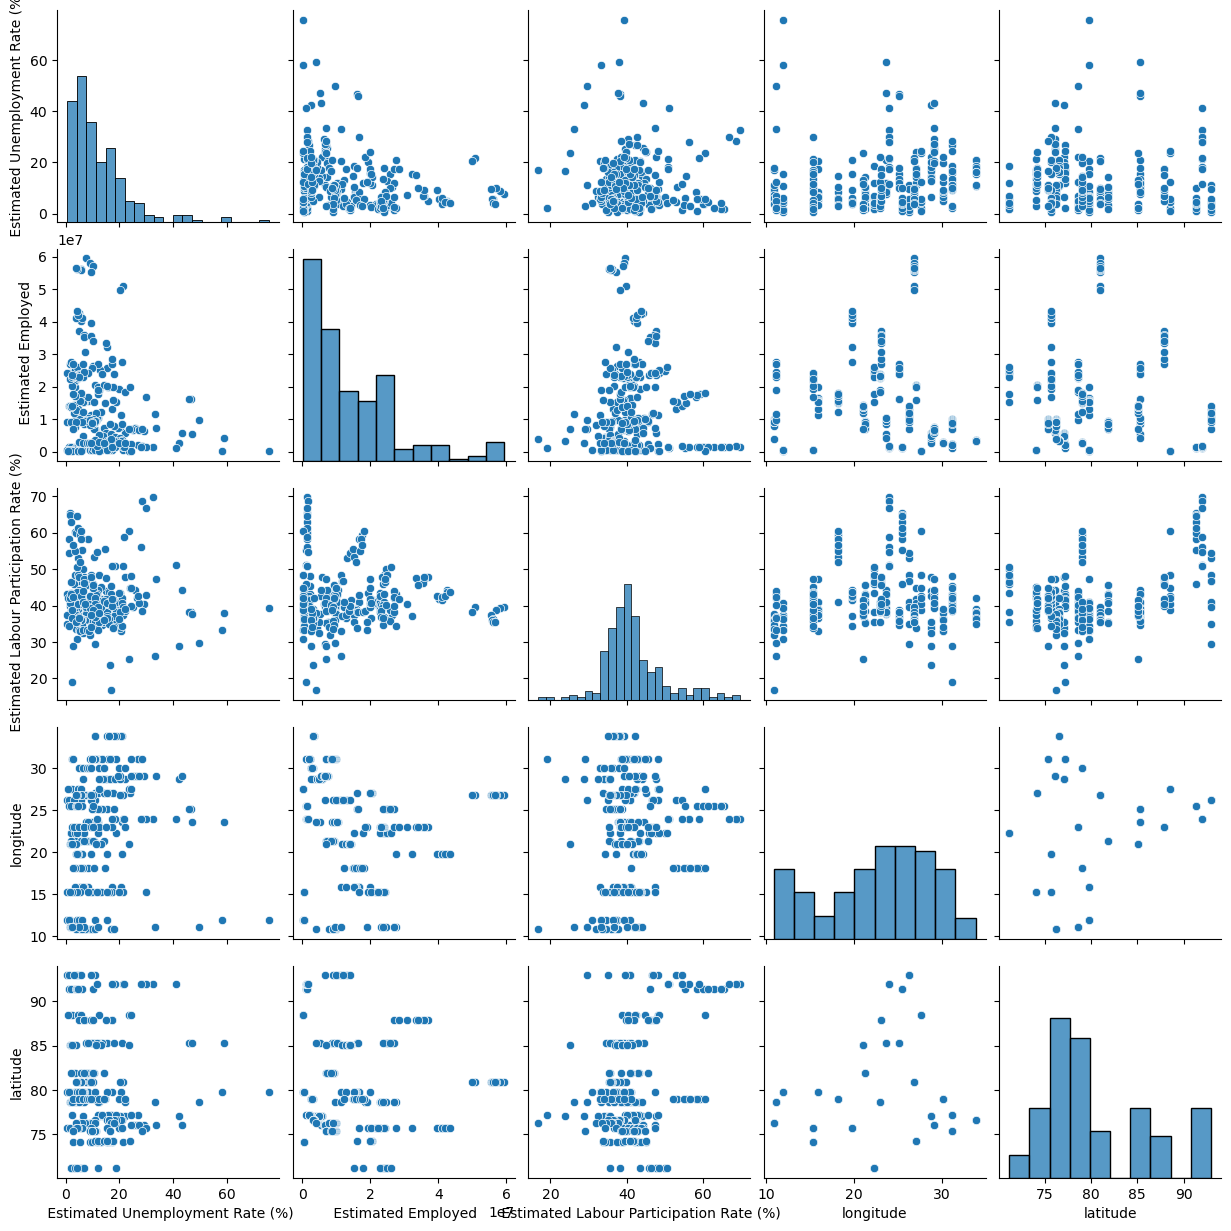

In [45]:
sns.pairplot(df1)

### 2. Histplot Region wise

<Axes: title={'center': 'Indian Employment'}, xlabel='Estimated Employee', ylabel='Count'>

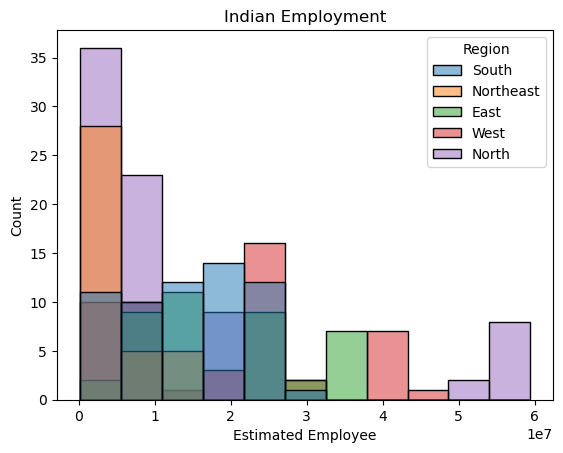

In [21]:
# histplot
plt.title("Indian Employment")
sns.histplot(x="Estimated Employee", hue="Region", data=df1 )

### 3. Creating a dashboard

In [28]:
df1.head(1)

,States,Date,Freqency,Estimated Unemployment Rate,Estimated Employee,Estimated Labour Participation Rate,Region,Logitude,Latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74


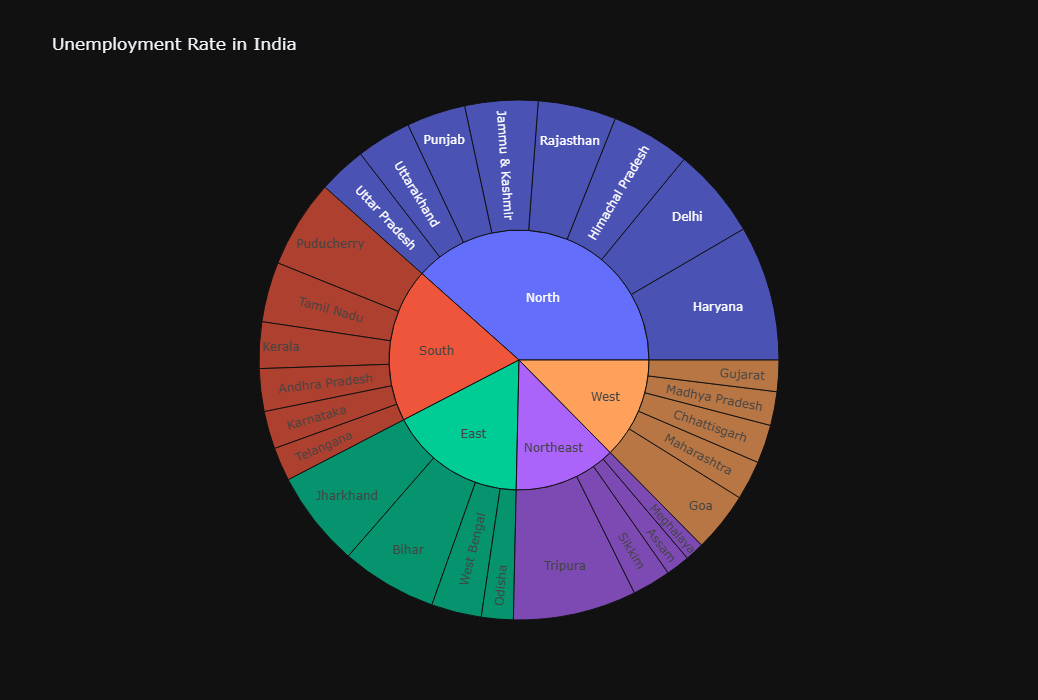

In [36]:
# Sun Bursh Chart
# Dataframe with relevant columns
unemployment = df1[["States", "Region", "Estimated Unemployment Rate"]]

# Creating Sun Burst Chart
figure = px.sunburst(unemployment, path=["Region", "States"],
                    values="Estimated Unemployment Rate",
                    width = 700, height=700, color_continuous_scale="rdylbu",
                    title = "Unemployment Rate in India", template="plotly_dark")
figure.show()

### Impact of lockdown on states Estimated Employed

In [51]:
# formatting cols and dt
import calendar
# Date cols into date time cols
df1['Date'] = pd.to_datetime(df1['Date'], dayfirst=True)

# converting frequency and region cols into categorical data type
df1['Frequency'] = df1['Frequency'].astype('category')
df1['Region'] = df1['Region'].astype('category')

#Extracting mont from date and creating  'Month' col
df1['Month'] = df1['Date'].dt.month

# convert month to int form
df1['Month_int'] = df1['Month'].apply(lambda x: int(x))

# Mapping int month values to abreviated month values
df1['Month_name'] = df1['Month_int'].apply(lambda x: calendar.month_abbr[x])

# Dropping the org month col
df1.drop(columns = 'Month', inplace = True)

df1.head()

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employee,Estimated Labour Participation Rate,Region,Logitude,Latitude,Month_int,Month_name
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4,Apr
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5,May


In [59]:
# Step 1: Filter data
bf_lockdown = df1[(df1['Month_int'] >= 1) & (df1['Month_int'] <= 4)]
lockdown = df1[(df1['Month_int'] >= 4) & (df1['Month_int'] <= 7)]  # Fix your second condition!

# Step 2: Group and calculate mean
m_bf_lock = bf_lockdown.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()
m_lock = lockdown.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()

# Step 3: Merge data correctly
m_lock['Unemployment Rate before lockdown'] = m_bf_lock['Estimated Unemployment Rate']

# Step 4: Rename columns
m_lock.columns = ['States', 'Unemployment Rate after lockdown', 'Unemployment Rate before lockdown']
m_lock.head()


,States,Unemployment Rate after lockdown,Unemployment Rate before lockdown
0,Andhra Pradesh,12.3975,9.4025
1,Assam,6.2450,6.2250
2,Bihar,30.8025,20.7425
3,Chhattisgarh,9.6025,7.2450
4,Delhi,24.3600,17.6975


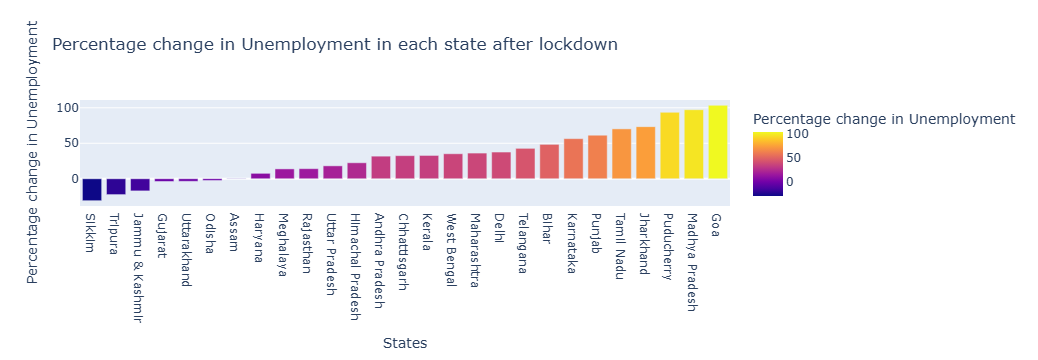

In [60]:
# percentage change in unemployment rate
m_lock['Percentage change in Unemployment'] = round(
    (m_lock['Unemployment Rate after lockdown'] - m_lock['Unemployment Rate before lockdown']) 
    / m_lock['Unemployment Rate before lockdown'] * 100, 2
)

# sorting for better visualization
plot_per = m_lock.sxort_values('Percentage change in Unemployment')

# percentage change in unemployment after lockdown (bar chart)
fig = px.bar(
    plot_per, 
    x='States', 
    y='Percentage change in Unemployment', 
    color='Percentage change in Unemployment',
    title='Percentage change in Unemployment in each state after lockdown'
)

fig.show()


## Checking for NAN values

In [46]:
df1.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

### 2. Checking for outliers

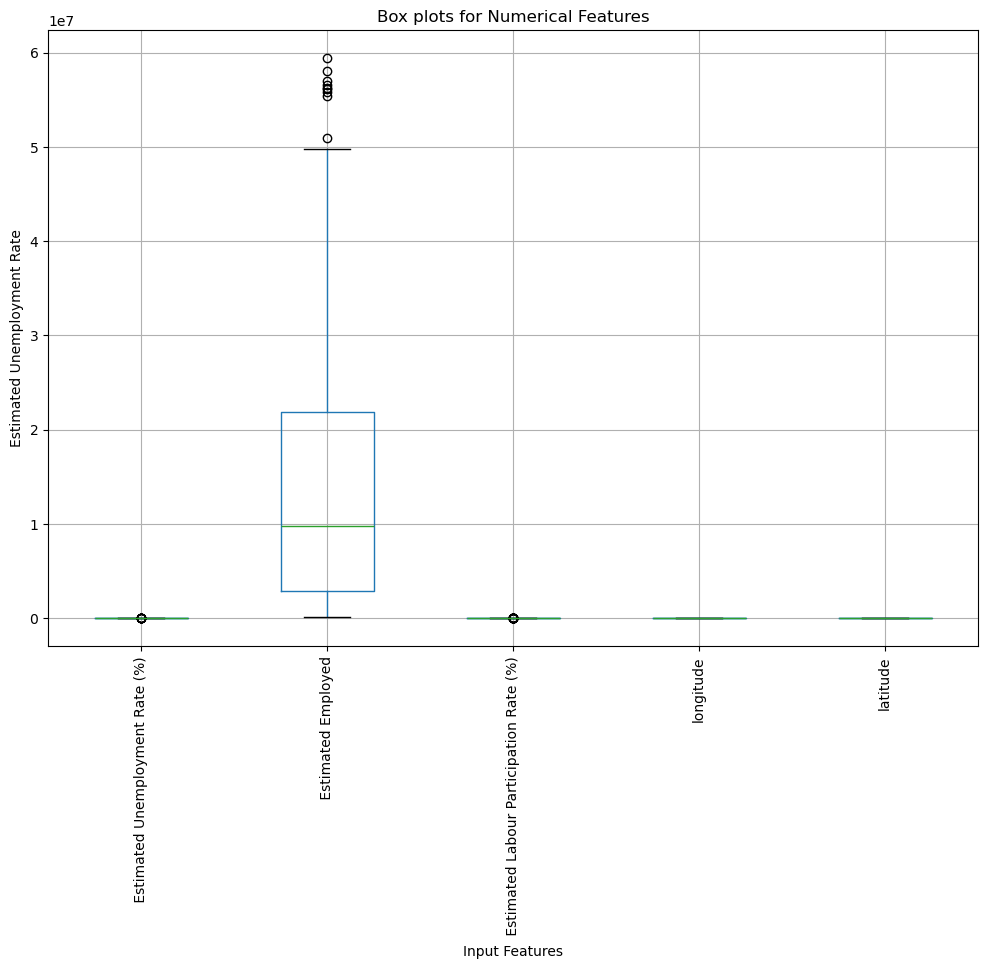

In [47]:
# creating box plot for all numerical features

numerical_columns = df1.select_dtypes(include=['int', 'float']).columns

plt.figure(figsize=(12, 8))
df1[numerical_columns].boxplot()
plt.xticks(rotation=90)
plt.title('Box plots for Numerical Features')
plt.xlabel('Input Features')
plt.ylabel('Estimated Unemployment Rate')
plt.show()

In [7]:
df1 = df1.rename(columns={' Estimated Unemployment Rate (%)': 'Estimated_Unemployment_Rate'})

In [54]:
df1.head(1)

,Region,Date,Frequency,Estimated_Unemployment_Rate,Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74


In [51]:
print(type(df1))

<class 'pandas.core.frame.DataFrame'>


In [52]:
print(df1.columns.tolist())

['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)', 'Region.1', 'longitude', 'latitude']


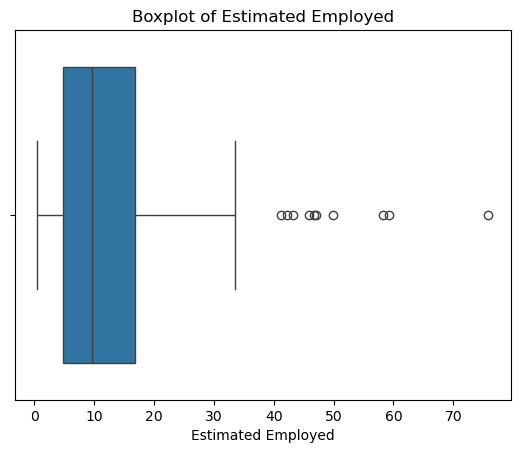

In [55]:
sns.boxplot(x=df1['Estimated_Unemployment_Rate'])
plt.title('Boxplot of Estimated Employed')
plt.xlabel('Estimated Employed')
plt.show()

## Step 5 - Correlation Matrix

In [4]:
df1.corr(numeric_only = True)

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
Estimated Unemployment Rate (%),1.000000,-0.245176,-0.073540,0.149976,-0.023976
Estimated Employed,-0.245176,1.000000,-0.047948,-0.113664,-0.119321
Estimated Labour Participation Rate (%),-0.073540,-0.047948,1.000000,0.080372,0.397836
longitude,0.149976,-0.113664,0.080372,1.000000,0.125895
latitude,-0.023976,-0.119321,0.397836,0.125895,1.000000


<Axes: >

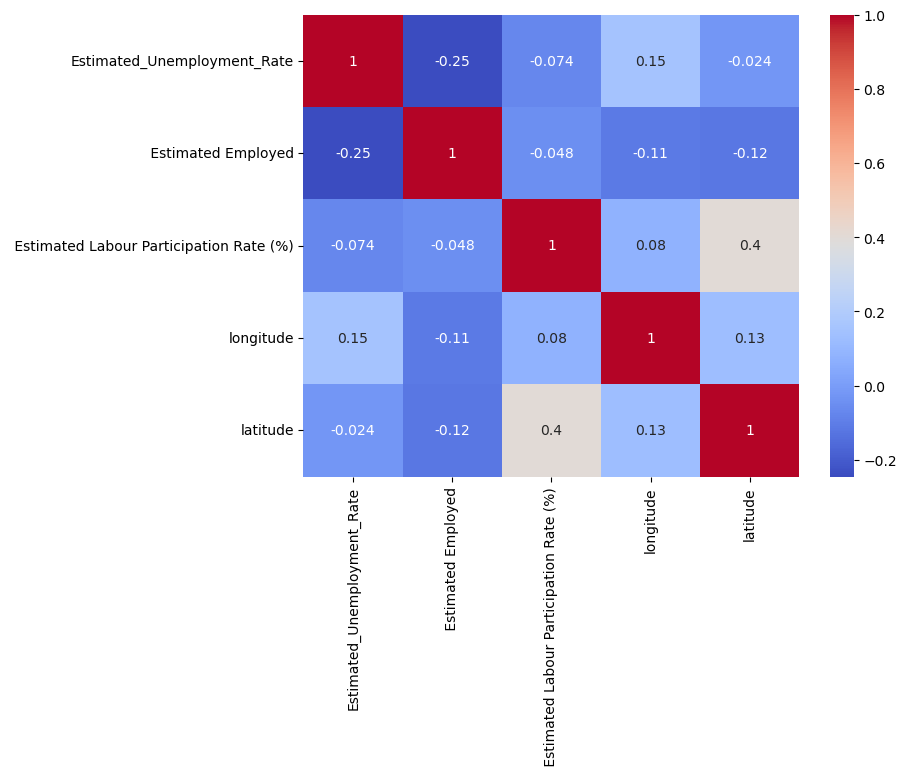

In [8]:
corr = df1.corr(numeric_only = True)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(corr, annot = True, ax = ax, cmap = 'coolwarm')